<a href="https://colab.research.google.com/github/jumbokh/csu1101-ML-Class/blob/main/notebooks/HW_DTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [129]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv (r'students.csv')
print (df.head())

   id class Gendar player
0   1     A      F      y
1   2     A      F      y
2   3     A      M      y
3   4     A      M      y
4   5     A      M      y


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30 non-null     int64 
 1   class   30 non-null     object
 2   Gendar  30 non-null     object
 3   player  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [132]:
df['id'] = df['id'].astype(int)
df['class'] = df['class'].map( {'A': 1, 'B': 2} ).astype(int)
df['Gendar'] = df['Gendar'].map( {'F': 1, 'M': 0} ).astype(int)
df['player'] = df['player'].map( {'y': 1, 'n': 0} ).astype(int)

print (df.head())
print(df.info())

   id  class  Gendar  player
0   1      1       1       1
1   2      1       1       1
2   3      1       0       1
3   4      1       0       1
4   5      1       0       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      30 non-null     int64
 1   class   30 non-null     int64
 2   Gendar  30 non-null     int64
 3   player  30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB
None


In [133]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

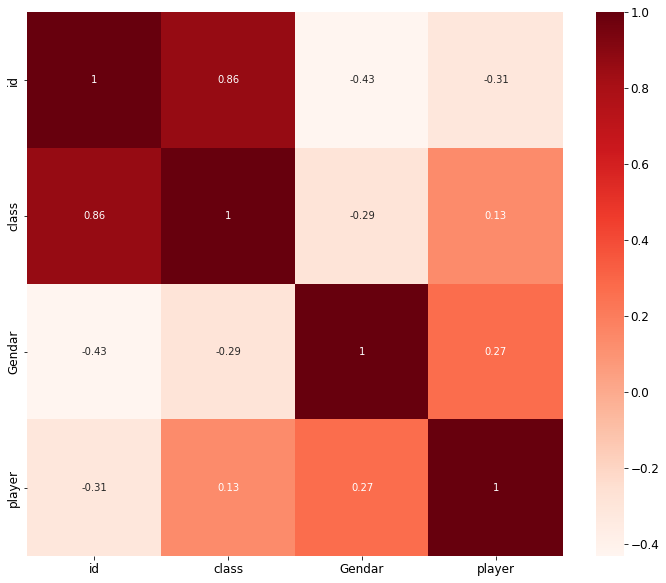

In [134]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [135]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop(['player'],axis=1)
y = df['player']
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [136]:
grp_cnt = df.columns.shape[:0]
df_column_name = pd.DataFrame(df.columns)
df_column_name =df_column_name.iloc[:3]
df_column_name

,0
0,id
1,class
2,Gendar


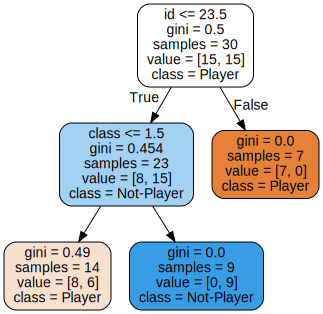

In [137]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os
feature_cols = ['id','class','Gendar']
target = ['Player','Not-Player']
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "player_tree.dot"),
        feature_names=feature_cols,
        class_names=target,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "player_tree.dot"))